In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
X_filepath = '/home/Chess-Piece-Threat-Detection/dataset/int-boards/data.npy'
y_filepath = '/home/Chess-Piece-Threat-Detection/dataset/int-boards/data_labels.npy'

In [3]:
y = np.load(y_filepath)
X = np.load(X_filepath)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train = X_train / 5
X_test = X_test / 5

In [6]:
X_train = X_train.reshape(80000, 8, 8, 1)
X_test = X_test.reshape(20000, 8, 8, 1)

In [7]:
#Original Model:
original_model = keras.Sequential()
original_model.add(Conv2D(128, input_shape=(8, 8, 1), padding='same', kernel_size=4, activation='LeakyReLU'))
original_model.add(Conv2D(128, kernel_size=4, padding='same', activation='LeakyReLU'))
original_model.add(Conv2D(32, kernel_size=4, padding='same', activation='LeakyReLU'))
original_model.add(Flatten())
original_model.add(Dense(6, activation='softmax'))

In [8]:
original_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 128)         2176      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         262272    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          65568     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 342,310
Trainable params: 342,310
Non-trainable params: 0
_________________________________________________________________


In [9]:
es = EarlyStopping(monitor='val_loss', patience=5)

In [10]:
original_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
original_startTime = time.time()
original_history = original_model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/100
250/250 [==============================] - 126s 404ms/step - loss: 0.5586 - accuracy: 0.1713 - val_loss: 0.5365 - val_accuracy: 0.1832
Epoch 2/100
250/250 [==============================] - 97s 387ms/step - loss: 0.5309 - accuracy: 0.2010 - val_loss: 0.5231 - val_accuracy: 0.2399
Epoch 3/100
250/250 [==============================] - 97s 390ms/step - loss: 0.5131 - accuracy: 0.2230 - val_loss: 0.5085 - val_accuracy: 0.2661
Epoch 4/100
250/250 [==============================] - 98s 391ms/step - loss: 0.4980 - accuracy: 0.2366 - val_loss: 0.4970 - val_accuracy: 0.2266
Epoch 5/100
250/250 [==============================] - 100s 399ms/step - loss: 0.4879 - accuracy: 0.2457 - val_loss: 0.4887 - val_accuracy: 0.2231
Epoch 6/100
250/250 [==============================] - 97s 388ms/step - loss: 0.4795 - accuracy: 0.2554 - val_loss: 0.4763 - val_accuracy: 0.2462
Epoch 7/100
250/250 [==============================] - 97s 388ms/step - loss: 0.4710 - accuracy: 0.2711 - val_loss: 0.4701

In [12]:
original_executionTime = (time.time() - original_startTime)
print('Execution time in seconds for original_model: ' + str(original_executionTime))

Execution time in seconds for original_model: 3336.126036643982


In [13]:
original_model.evaluate(X_test, y_test, batch_size=175, verbose=1)

115/115 [==============================] - 11s 82ms/step - loss: 0.4032 - accuracy: 0.3927


[0.40319469571113586, 0.39274999499320984]

In [24]:
original_predictions = original_model.predict(X_test)
print(original_predictions[42])
print(y_test[42])

[1.3933507e-02 7.4667612e-04 9.4675040e-01 1.0069958e-02 1.6619106e-04
 2.8333193e-02]
[1. 0. 1. 1. 0. 0.]


Text(0,0.5,'Loss Value')

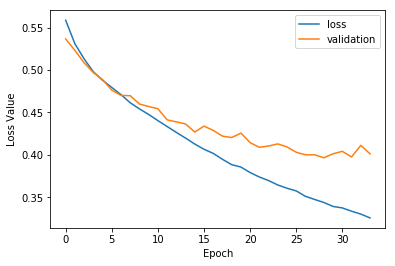

In [15]:
plt.plot(original_history.history['loss'], label='loss')
plt.plot(original_history.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

In [16]:
#AlexNet-Based Model:
model = keras.Sequential()

model.add(Conv2D(32, input_shape=(8, 8, 1), padding='same', kernel_size=11, activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=8, padding='same', activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size=8, padding='same', activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size=6, padding='same', activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=4, padding='same', activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Flatten())

model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))

model.add(Dense(6, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 32)          3904      
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 32)          128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          131136    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)         

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
startTime = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/100
250/250 [==============================] - 102s 370ms/step - loss: 0.5590 - accuracy: 0.1680 - val_loss: 1.7691 - val_accuracy: 0.4884
Epoch 2/100
250/250 [==============================] - 91s 365ms/step - loss: 0.5386 - accuracy: 0.1856 - val_loss: 1.3391 - val_accuracy: 0.3739
Epoch 3/100
250/250 [==============================] - 91s 366ms/step - loss: 0.5355 - accuracy: 0.1847 - val_loss: 0.5825 - val_accuracy: 0.3484
Epoch 4/100
250/250 [==============================] - 97s 387ms/step - loss: 0.5336 - accuracy: 0.1933 - val_loss: 0.5353 - val_accuracy: 0.2248
Epoch 5/100
250/250 [==============================] - 97s 385ms/step - loss: 0.5323 - accuracy: 0.1927 - val_loss: 0.5382 - val_accuracy: 0.2103
Epoch 6/100
250/250 [==============================] - 97s 386ms/step - loss: 0.5316 - accuracy: 0.1972 - val_loss: 0.5345 - val_accuracy: 0.2412
Epoch 7/100
250/250 [==============================] - 96s 385ms/step - loss: 0.5307 - accuracy: 0.1947 - val_loss: 0.5333 

In [20]:
executionTime = (time.time() - startTime)
print('Execution time in seconds for model: ' + str(executionTime))

Execution time in seconds for model: 1719.4026618003845


In [21]:
model.evaluate(X_test, y_test, batch_size=175, verbose=1)

115/115 [==============================] - 8s 67ms/step - loss: 0.5290 - accuracy: 0.1629


[0.5289643406867981, 0.1628500074148178]

In [22]:
predictions = model.predict(X_test)
print(predictions[1])
print(y_test[1])

[2.8668204e-01 1.8794081e-01 5.1728811e-02 5.1537156e-03 5.0612052e-05
 4.6844408e-01]
[1. 0. 0. 0. 0. 0.]


Text(0,0.5,'Loss Value')

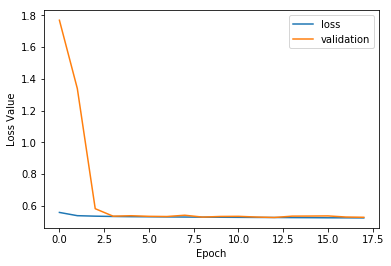

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss Value')